# 스무딩 실습

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 시계열 데이터, 데이터 프레임, 원본 시계열 데이터 시각화 

In [3]:
dates= pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규분포를 따르는 데이터 생성

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01  -9.256325
1  2023-01-02  17.663443
2  2023-01-03   4.711373
3  2023-01-04 -23.053759
4  2023-01-05  10.292235
..        ...        ...
95 2023-04-06   9.855174
96 2023-04-07  11.749980
97 2023-04-08 -23.238654
98 2023-04-09  18.422452
99 2023-04-10   1.742369

[100 rows x 2 columns]


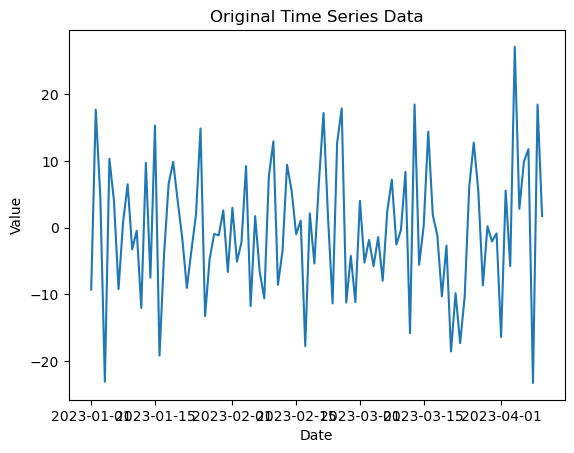

In [4]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

### 이동평균을 사용한 스무딩

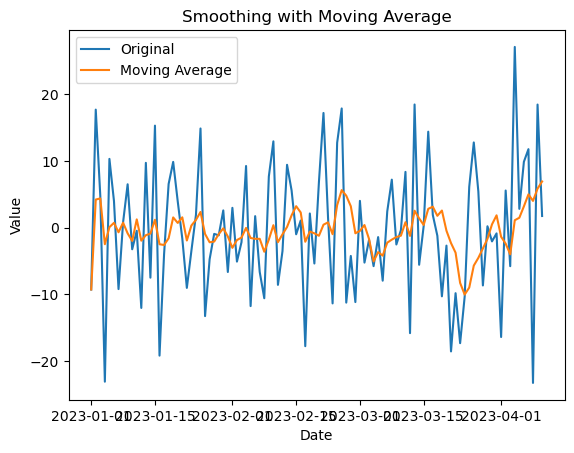

In [5]:
#이동평균 윈도우 크기 설정
window_size = 7

#이동평균 계산
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.legend()
plt.show()

min_periods=1 은 최소한 하나의 유효한 값이 있는 구간에서도 평균을 계산하도록 설정합니다.

### 스무딩 --> 지수평활법

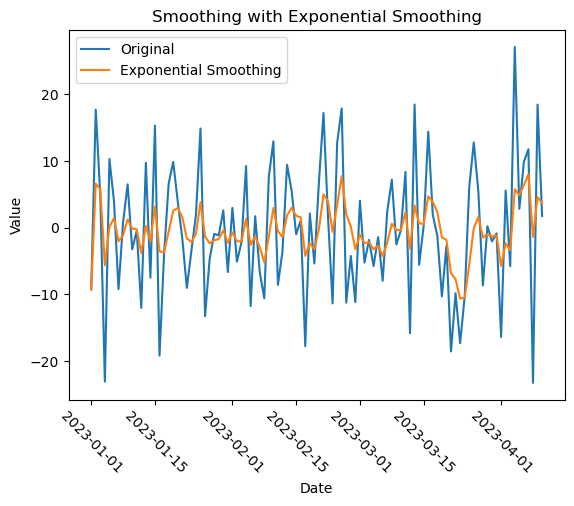

In [8]:
alpha = 0.3

# 지수평활법 계산
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.legend()
plt.xticks(rotation=-45)
plt.show()


데이터가 긴 시간 동안 변하지 않은 경우에는 이동평균을 사용하는 것이 적절할 수 있습니다.
데이터가 짧은 시간 동안 빠르게 변화하거나 최신 정보에 더 관심이 있는 경우에는 지수평활법을 사용하는 것이 적절할 수 있습니다.